# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


1) The task is to design a machine learning model that is able to predict whether a video is a claim or opinion with excellent certainty. Since false positives will be mislabeled opinions, false negatives will be mislabeled claims, and ban status correlates stronger to claims, we will want a metric that minimizes false negatives which is recall.

2) The ultimate purpose of this model is to combat misinformation and hate speech, which are both types of claims. As a result these claims result in bans. A false negative will allow content and users deemed harmful by the platform to linger and affect the broader userbase negatively. A false positive meanwhile will flag content for human review, where it can then be disregarded as adhering to platform policy. Thgerefore it is much more important to target false negatives.

3) Since the dataset contains thousands of data points, it is sufficiently large to implement validation sets and tune for hyperparameters, so that is how this project will be proceeded with.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Import packages for data preprocessing

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

In [12]:
outliers = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

for column in outliers:
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)

    iqr = percentile75 - percentile25

    column_mean = data[column].mean()
    
    lower_threshold = column_mean - 1.5 * iqr
    upper_threshold = column_mean + 1.5 *iqr
    
    outliers_mask = (data[column] < lower_threshold) | (data[column] > upper_threshold)
    outliers = data[outliers_mask][column].count()
    
    print('Number of outliers, {0}: {1}'.format(column, outliers))

Number of outliers, video_duration_sec: 0
Number of outliers, video_view_count: 0
Number of outliers, video_like_count: 2188
Number of outliers, video_share_count: 2586
Number of outliers, video_download_count: 2551
Number of outliers, video_comment_count: 2646


Check class balance.

In [13]:
# Check class balance
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['transcription_length'] = data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [15]:
# Calculate the average text_length for claims and opinions
data['transcription_length'].mean()

89.09353385034584

Visualize the distribution of `text_length` for claims and opinions.

<Axes: xlabel='transcription_length', ylabel='Count'>

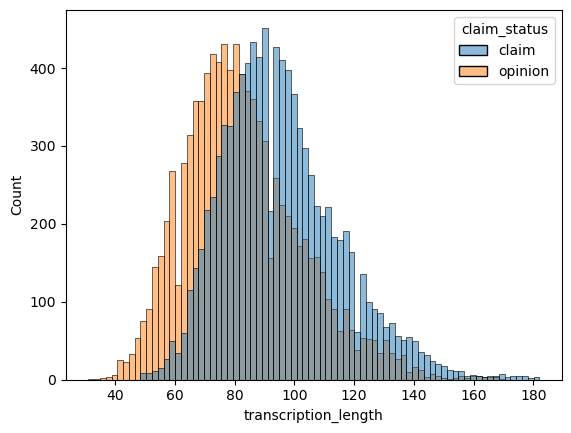

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data,
             x='transcription_length',
             hue='claim_status')

**Feature selection and transformation**

Encode target and catgorical variables.

In [17]:
# Create a copy of the X data
X = data.copy().drop(columns=['claim_status'])

# Drop unnecessary columns
X = X.drop(columns=['#', 'video_id', 'video_transcription_text'])

# Encode target variable
y = data['claim_status']
y = y.replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)

### **Task 4: Split the data**

Assign target variable.

In [18]:
# Isolate target variable
bruh = 'i already did that smh'

Isolate the features.

In [19]:
# Isolate features
print(bruh)

# Display first few rows of features dataframe
X.head()

i already did that smh


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [20]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y,
                                              test_size=0.2,
                                              random_state=40563)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [21]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr,
                                                  test_size=0.25,
                                                  random_state=40563)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [22]:
# Get shape of each training, validation, and testing set
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(11450, 10)
(3817, 10)
(3817, 10)
(11450,)
(3817,)
(3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [23]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=40563)

# Create a dictionary of hyperparameters to tune
rf_cv_params = {'max_depth': [5, 7, None],
                'max_features': [0.3, 0.6],
                'max_samples': [0.7],
                'min_samples_leaf': [1,2],
                'min_samples_split': [2,3],
                'n_estimators': [75,100,200],}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, rf_cv_params,
                     scoring=scoring,
                     cv=5,
                     refit='recall')

In [24]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 6min 3s, sys: 897 ms, total: 6min 4s
Wall time: 6min 6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40563),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [25]:
# Get all the results from the CV and put them in a df
rf_cv_df= pd.DataFrame(rf_cv.cv_results_)

# Examine best recall score


# Isolate the row of the df with the max(mean precision score)
rf_cv_df[rf_cv_df['mean_test_precision'] == rf_cv_df['mean_test_precision'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.460321,0.047395,0.028959,0.002669,5,0.3,0.7,1,2,75,...,0.001011,38,0.995232,0.993056,0.996106,0.995236,0.994801,0.994886,0.001009,51
3,0.412904,0.016672,0.027938,0.001305,5,0.3,0.7,1,3,75,...,0.001011,38,0.995232,0.993056,0.996106,0.995236,0.994801,0.994886,0.001009,51
12,0.628259,0.042651,0.029702,0.002916,5,0.6,0.7,1,2,75,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
13,0.810881,0.035140,0.032465,0.003475,5,0.6,0.7,1,2,100,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
14,1.642194,0.040683,0.061224,0.005595,5,0.6,0.7,1,2,200,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
15,0.621501,0.042253,0.027387,0.003649,5,0.6,0.7,1,3,75,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
16,0.808699,0.016143,0.034468,0.002233,5,0.6,0.7,1,3,100,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
17,1.535791,0.028427,0.057686,0.005584,5,0.6,0.7,1,3,200,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
18,0.594411,0.031238,0.027463,0.002284,5,0.6,0.7,2,2,75,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16
19,0.798673,0.027697,0.034352,0.002862,5,0.6,0.7,2,2,100,...,0.000856,16,0.995232,0.993492,0.996106,0.995236,0.994801,0.994973,0.000853,16


In [26]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [27]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=40563)

# Create a dictionary of hyperparameters to tune
xgb_cv_params = {'max_depth': [4],
                 'min_child_weight': [3, 5],
                 'learning_rate': [0.01, 0.1],
                 'n_estimators': [300]}

# Define a dictionary of scoring metrics to capture
### i already did this????? ###

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, xgb_cv_params,
                      scoring=scoring,
                      cv=5,
                      refit='recall')

In [28]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 4h 54min 29s, sys: 45.1 s, total: 4h 55min 14s
Wall time: 2h 29min 34s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=40563, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [29]:
# Get all the results from the CV and put them in a df
xgb_cv_df= pd.DataFrame(xgb_cv.cv_results_)

# Isolate the row of the df with the max(mean precision score)
xgb_cv_df[xgb_cv_df['mean_test_precision'] == xgb_cv_df['mean_test_precision'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_precision,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,696.151839,18.371201,0.304475,0.002874,0.01,4,3,300,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.0,...,0.001216,1,0.995232,0.992618,0.996106,0.995671,0.994801,0.994885,0.001214,2
1,391.513530,161.670759,0.263579,0.080616,0.01,4,5,300,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.0,...,0.001084,3,0.995232,0.992618,0.995671,0.995236,0.994801,0.994712,0.001082,4


**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [41]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [42]:
# Display the predictions on the encoded testing set
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Display the true labels of the testing set.

In [32]:
# Display the true labels of the testing set
### YOUR CODE HERE ###

Create a confusion matrix to visualize the results of the classification model.

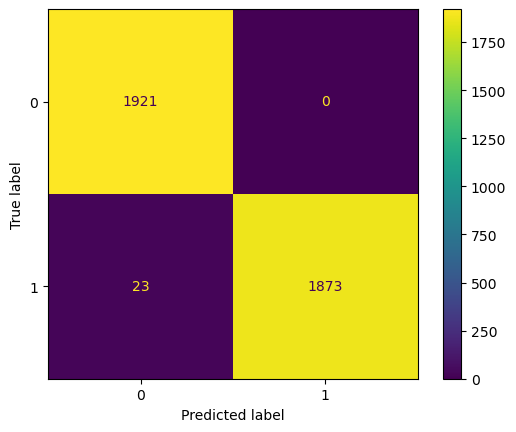

In [43]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [44]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1921
       claim       1.00      0.99      0.99      1896

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [46]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

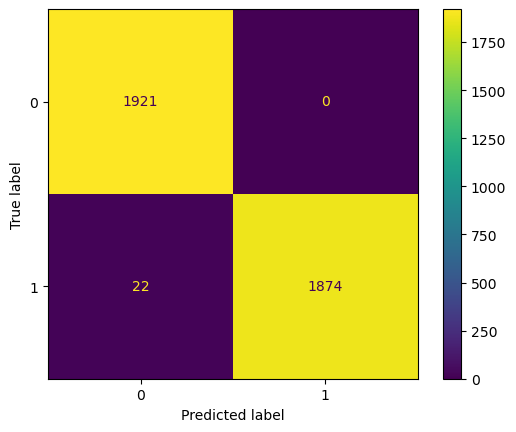

In [47]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [48]:
# Create a classification report
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1921
       claim       1.00      0.99      0.99      1896

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [49]:
y_pred = xgb_cv.best_estimator_.predict(X_test)

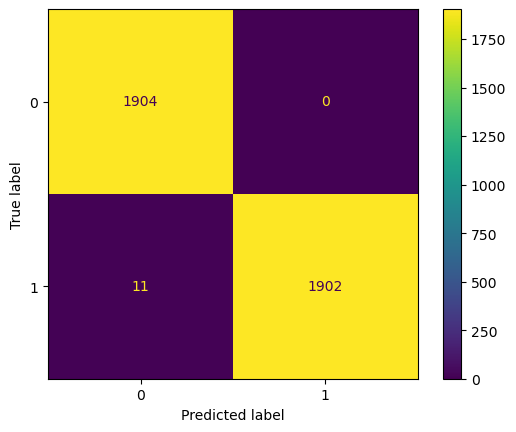

In [51]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

#### **Feature importances of champion model**


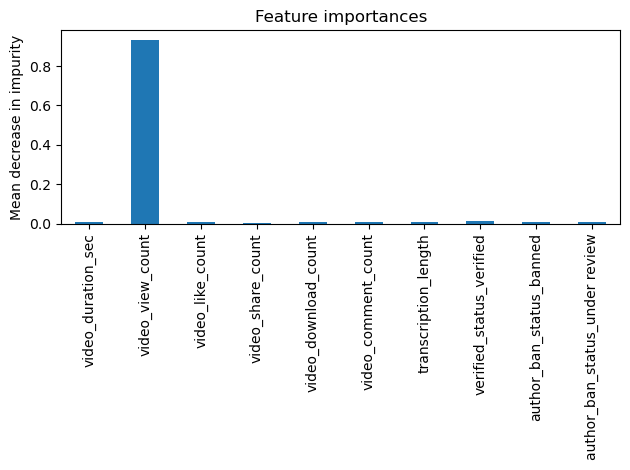

In [52]:
importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.